Bit size of the input data (training set): 64 bits
Bit size of the input data (test set): 64 bits
Accuracy before quantization: 0.8738
Runtime before quantization: 0.0034 seconds


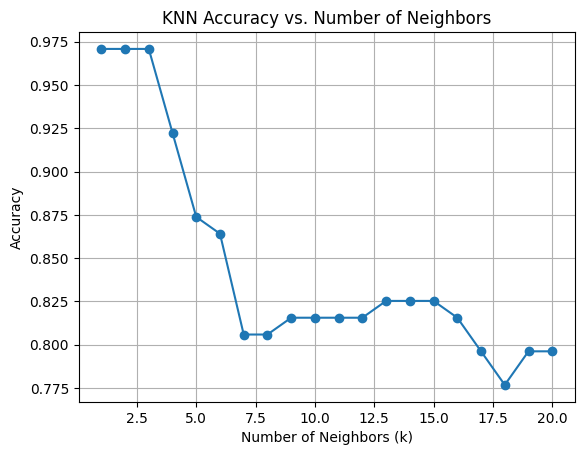

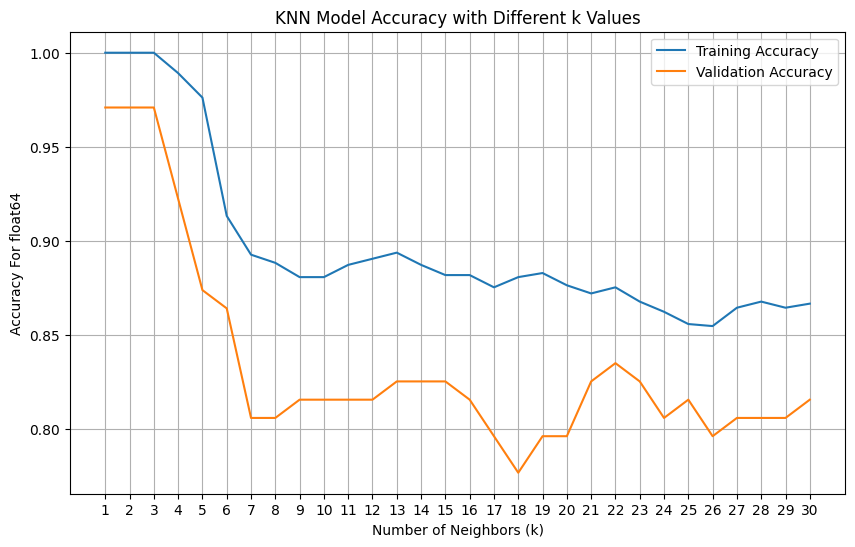

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import time

data_url = "https://drive.google.com/uc?id=1r_suZP4KhNxR05J68Qk9m3z4xl5kFvla"
df = pd.read_csv(data_url)

# Split the data into features (X) and labels (y)
X = df.drop('target', axis=1)
y = df['target']

# Apply feature scaling to the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Print the bit size of the input data
bit_size_train = X_scaled.dtype.itemsize * 8
print(f"Bit size of the input data (training set): {bit_size_train} bits")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# Print the bit size of the test set
bit_size_test = X_test.dtype.itemsize * 8
print(f"Bit size of the input data (test set): {bit_size_test} bits")

# Create and train the KNN model
start_time = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
end_time = time.time()

# Predict labels for the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Calculate the runtime
runtime = end_time - start_time

# Print the accuracy and runtime
print(f"Accuracy before quantization: {accuracy:.4f}")
print(f"Runtime before quantization: {runtime:.4f} seconds")

import matplotlib.pyplot as plt

# Lists to store accuracy and k values
accuracies = []
k_values = range(1, 21)  # Let's consider k from 1 to 20

# Loop through different values of k
for k in k_values:
    # Create and train the KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict labels for the test set
    y_pred = knn.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the graph
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors')
plt.grid(True)
plt.show()

import matplotlib.pyplot as plt

# Create lists to store accuracy values for different k values
k_values = list(range(1, 31))  # Let's consider k values from 1 to 20
train_accuracies = []
test_accuracies = []

# Loop through different k values and calculate accuracy for both train and test sets
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Training Accuracy')
plt.plot(k_values, test_accuracies, label='Validation Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy For float64')
plt.title('KNN Model Accuracy with Different k Values')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
import matplotlib.pyplot as plt

# Lists to store accuracy and k values
accuracies = []
k_values = range(1, 21)  # Let's consider k from 1 to 20

# Loop through different values of k
for k in k_values:
    # Create and train the KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict labels for the test set
    y_pred = knn.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the graph
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors')
plt.grid(True)
plt.show()


NameError: ignored

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, QuantileTransformer
import time

data_url = "https://drive.google.com/uc?id=1r_suZP4KhNxR05J68Qk9m3z4xl5kFvla"
df = pd.read_csv(data_url)

# Split the data into features (X) and labels (y)
X = df.drop('target', axis=1)
y = df['target']

# Apply feature scaling to the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Print the bit size of the input data
bit_size_train = X_scaled.dtype.itemsize * 8
print(f"Bit size of the input data (training set): {bit_size_train} bits")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# Print the bit size of the test set
bit_size_test = X_test.dtype.itemsize * 8
print(f"Bit size of the input data (test set): {bit_size_test} bits")

# Apply quantization using QuantileTransformer
quantile_transformer = QuantileTransformer(n_quantiles=32, output_distribution='uniform', ignore_implicit_zeros=False, subsample=1000, random_state=None)
X_train_quantized = quantile_transformer.fit_transform(X_train)
X_test_quantized = quantile_transformer.transform(X_test)

# Convert the quantized data to float32
X_train_quantized = X_train_quantized.astype(np.int32)
X_test_quantized = X_test_quantized.astype(np.int32)

# Print the bit size of the quantized data
quantized_bit_size_train = X_train_quantized.dtype.itemsize * 8
print(f"Bit size of the quantized data (training set): {quantized_bit_size_train} bits")

quantized_bit_size_test = X_test_quantized.dtype.itemsize * 8
print(f"Bit size of the quantized data (test set): {quantized_bit_size_test} bits")

# Create and train the KNN model on the quantized training set
start_time = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train_quantized, y_train)
end_time = time.time()

# Predict labels for the quantized test set
y_pred_quantized = knn.predict(X_test_quantized)

# Calculate the accuracy of the model on the quantized test set
accuracy_quantized = accuracy_score(y_test, y_pred_quantized)

# Calculate the runtime
runtime = end_time - start_time

# Print the accuracy and runtime after quantization
print(f"Accuracy after quantization: {accuracy_quantized:.4f}")
print(f"Runtime after quantization: {runtime:.4f} seconds")


Bit size of the input data (training set): 64 bits
Bit size of the input data (test set): 64 bits
Bit size of the quantized data (training set): 32 bits
Bit size of the quantized data (test set): 32 bits
Accuracy after quantization: 0.8447
Runtime after quantization: 0.0035 seconds


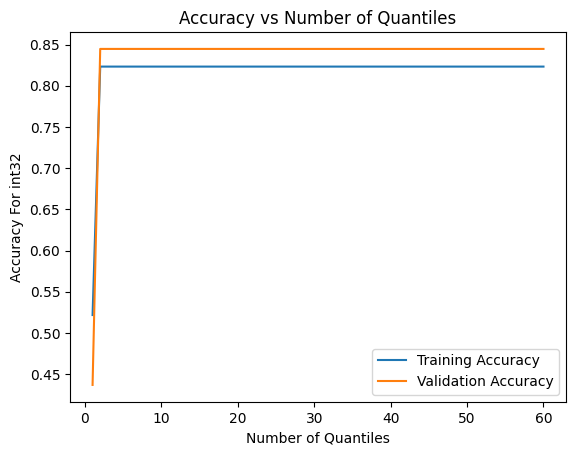

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, QuantileTransformer
import time
import matplotlib.pyplot as plt

data_url = "https://drive.google.com/uc?id=1r_suZP4KhNxR05J68Qk9m3z4xl5kFvla"
df = pd.read_csv(data_url)

# Split the data into features (X) and labels (y)
X = df.drop('target', axis=1)
y = df['target']

# Apply feature scaling to the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# Define the range of quantiles
quantile_range = range(1, 61)

# Lists to store training and validation accuracy
train_accuracy_list = []
val_accuracy_list = []
quantile_list = []

for n_quantiles in quantile_range:
    # Apply quantization using QuantileTransformer
    quantile_transformer = QuantileTransformer(n_quantiles=n_quantiles, output_distribution='uniform',
                                               ignore_implicit_zeros=False, subsample=1000, random_state=None)
    X_train_quantized = quantile_transformer.fit_transform(X_train)
    X_test_quantized = quantile_transformer.transform(X_test)

    # Convert the quantized data to float32
    X_train_quantized = X_train_quantized.astype(np.int32)
    X_test_quantized = X_test_quantized.astype(np.int32)

    # Create and train the KNN model on the quantized training set
    knn = KNeighborsClassifier()
    knn.fit(X_train_quantized, y_train)

    # Predict labels for the quantized training and validation sets
    y_pred_train = knn.predict(X_train_quantized)
    y_pred_val = knn.predict(X_test_quantized)

    # Calculate the accuracy of the model on the quantized training and validation sets
    train_accuracy = accuracy_score(y_train, y_pred_train)
    val_accuracy = accuracy_score(y_test, y_pred_val)

    # Append accuracy and quantile values to the lists
    train_accuracy_list.append(train_accuracy)
    val_accuracy_list.append(val_accuracy)
    quantile_list.append(n_quantiles)

# Plot the graph
plt.plot(quantile_list, train_accuracy_list, label='Training Accuracy')
plt.plot(quantile_list, val_accuracy_list, label='Validation Accuracy')
plt.xlabel("Number of Quantiles")
plt.ylabel("Accuracy For int32")
plt.title("Accuracy vs Number of Quantiles")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, QuantileTransformer
import time
import matplotlib.pyplot as plt

data_url = "https://drive.google.com/uc?id=1r_suZP4KhNxR05J68Qk9m3z4xl5kFvla"
df = pd.read_csv(data_url)

# Split the data into features (X) and labels (y)
X = df.drop('target', axis=1)
y = df['target']

# Apply feature scaling to the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# Define the range of quantiles
quantile_range = range(1, 61)

# Lists to store accuracy and quantile values
accuracy_list = []
quantile_list = []

for n_quantiles in quantile_range:
    # Apply quantization using QuantileTransformer
    quantile_transformer = QuantileTransformer(n_quantiles=n_quantiles, output_distribution='uniform',
                                               ignore_implicit_zeros=False, subsample=1000, random_state=None)
    X_train_quantized = quantile_transformer.fit_transform(X_train)
    X_test_quantized = quantile_transformer.transform(X_test)

    # Convert the quantized data to float32
    X_train_quantized = X_train_quantized.astype(np.float32)
    X_test_quantized = X_test_quantized.astype(np.float32)

    # Create and train the KNN model on the quantized training set
    knn = KNeighborsClassifier()
    knn.fit(X_train_quantized, y_train)

    # Predict labels for the quantized test set
    y_pred_quantized = knn.predict(X_test_quantized)

    # Calculate the accuracy of the model on the quantized test set
    accuracy_quantized = accuracy_score(y_test, y_pred_quantized)

    # Append accuracy and quantile values to the lists
    accuracy_list.append(accuracy_quantized)
    quantile_list.append(n_quantiles)

# Plot the graph
plt.plot(quantile_list, accuracy_list)
plt.xlabel("Number of Quantiles")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Quantiles")
plt.show()


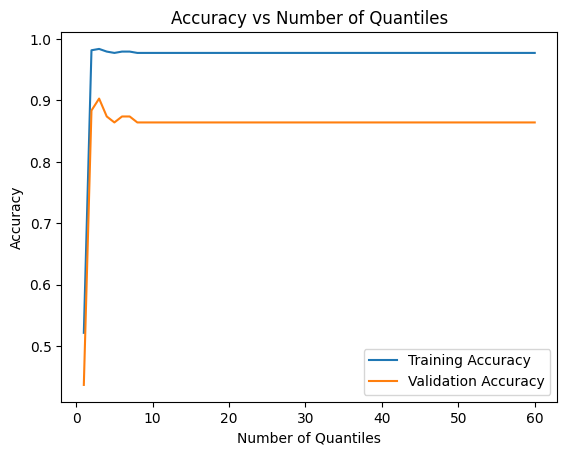

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import time

data_url = "https://drive.google.com/uc?id=1r_suZP4KhNxR05J68Qk9m3z4xl5kFvla"
df = pd.read_csv(data_url)

# Split the data into features (X) and labels (y)
X = df.drop('target', axis=1)
y = df['target']

# Apply feature scaling to the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Print the bit size of the input data
bit_size_train = X_scaled.dtype.itemsize * 8
print(f"Bit size of the input data (training set): {bit_size_train} bits")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print the bit size of the test set
bit_size_test = X_test.dtype.itemsize * 8
print(f"Bit size of the input data (test set): {bit_size_test} bits")

# Apply quantization using numpy.round
X_train_quantized = np.round(X_train, decimals=4, out=None).astype(np.int32)
X_test_quantized = np.round(X_test, decimals=4, out=None).astype(np.int32)

# Print the bit size of the quantized data
quantized_bit_size_train = X_train_quantized.dtype.itemsize * 8
print(f"Bit size of the quantized data (training set): {quantized_bit_size_train} bits")

quantized_bit_size_test = X_test_quantized.dtype.itemsize * 8
print(f"Bit size of the quantized data (test set): {quantized_bit_size_test} bits")

# Create and train the KNN model on the quantized training set
start_time = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train_quantized, y_train)
end_time = time.time()

# Predict labels for the quantized test set
y_pred_quantized = knn.predict(X_test_quantized)

# Calculate the accuracy of the model on the quantized test set
accuracy_quantized = accuracy_score(y_test, y_pred_quantized)

# Calculate the runtime
runtime = end_time - start_time

# Print the accuracy and runtime after quantization
print(f"Accuracy after quantization: {accuracy_quantized:.4f}")
print(f"Runtime after quantization: {runtime:.4f} seconds")


Bit size of the input data (training set): 64 bits
Bit size of the input data (test set): 64 bits
Bit size of the quantized data (training set): 32 bits
Bit size of the quantized data (test set): 32 bits
Accuracy after quantization: 0.8634
Runtime after quantization: 0.0027 seconds


Bit size of the input data (training set): 64 bits
Bit size of the input data (test set): 64 bits


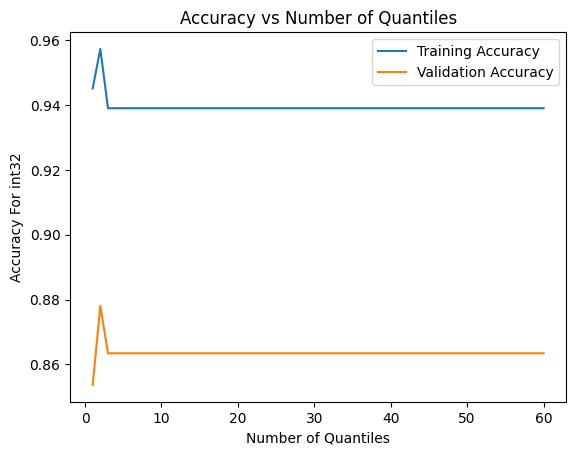

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pyplot as plt

data_url = "https://drive.google.com/uc?id=1r_suZP4KhNxR05J68Qk9m3z4xl5kFvla"
df = pd.read_csv(data_url)

# Split the data into features (X) and labels (y)
X = df.drop('target', axis=1)
y = df['target']

# Apply feature scaling to the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print the bit size of the input data
bit_size_train = X_scaled.dtype.itemsize * 8
print(f"Bit size of the input data (training set): {bit_size_train} bits")

# Print the bit size of the test set
bit_size_test = X_test.dtype.itemsize * 8
print(f"Bit size of the input data (test set): {bit_size_test} bits")

# Define the range of decimals (number of quantiles)
decimal_range = range(1, 61)

# Lists to store training and validation accuracy
train_accuracy_list = []
val_accuracy_list = []
decimal_list = []

for decimals in decimal_range:
    # Apply quantization using np.round
    X_train_quantized = np.round(X_train, decimals=decimals).astype(np.int32)
    X_test_quantized = np.round(X_test, decimals=decimals).astype(np.int32)

    # Create and train the KNN model on the quantized training set
    knn = KNeighborsClassifier()
    knn.fit(X_train_quantized, y_train)

    # Predict labels for the quantized training and validation sets
    y_pred_train = knn.predict(X_train_quantized)
    y_pred_val = knn.predict(X_test_quantized)

    # Calculate the accuracy of the model on the quantized training and validation sets
    train_accuracy = accuracy_score(y_train, y_pred_train)
    val_accuracy = accuracy_score(y_test, y_pred_val)

    # Append accuracy and decimal values to the lists
    train_accuracy_list.append(train_accuracy)
    val_accuracy_list.append(val_accuracy)
    decimal_list.append(decimals)

# Plot the graph
plt.plot(decimal_list, train_accuracy_list, label='Training Accuracy')
plt.plot(decimal_list, val_accuracy_list, label='Validation Accuracy')
plt.xlabel("Number of Quantiles")
plt.ylabel("Accuracy For int32")
plt.title("Accuracy vs Number of Quantiles")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
import time

data_url = "https://drive.google.com/uc?id=1r_suZP4KhNxR05J68Qk9m3z4xl5kFvla"
df = pd.read_csv(data_url)

# Split the data into features (X) and labels (y)
X = df.drop('target', axis=1)
y = df['target']

# Apply feature scaling to the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Print the bit size of the input data
bit_size_train = X_scaled.dtype.itemsize * 8
print(f"Bit size of the input data (training set): {bit_size_train} bits")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Print the bit size of the test set
bit_size_test = X_test.dtype.itemsize * 8
print(f"Bit size of the input data (test set): {bit_size_test} bits")

# Apply quantization using KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=32, encode='ordinal', strategy='uniform', dtype=None, subsample=None, random_state=None)
X_train_quantized = discretizer.fit_transform(X_train)
X_test_quantized = discretizer.transform(X_test)

# Convert the quantized data to float32
X_train_quantized = X_train_quantized.astype(np.int32)
X_test_quantized = X_test_quantized.astype(np.int32)

# Print the bit size of the quantized data
quantized_bit_size_train = X_train_quantized.dtype.itemsize * 8
print(f"Bit size of the quantized data (training set): {quantized_bit_size_train} bits")

quantized_bit_size_test = X_test_quantized.dtype.itemsize * 8
print(f"Bit size of the quantized data (test set): {quantized_bit_size_test} bits")

# Create and train the KNN model on the quantized training set
start_time = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train_quantized, y_train)
end_time = time.time()

# Predict labels for the quantized test set
y_pred_quantized = knn.predict(X_test_quantized)

# Calculate the accuracy of the model on the quantized test set
accuracy_quantized = accuracy_score(y_test, y_pred_quantized)

# Calculate the runtime
runtime = end_time - start_time

# Print the accuracy and runtime after quantization
print(f"Accuracy after quantization: {accuracy_quantized:.4f}")
print(f"Runtime after quantization: {runtime:.4f} seconds")


Bit size of the input data (training set): 64 bits
Bit size of the input data (test set): 64 bits
Bit size of the quantized data (training set): 32 bits
Bit size of the quantized data (test set): 32 bits
Accuracy after quantization: 0.8442
Runtime after quantization: 0.0031 seconds


Bit size of the input data (training set): 64 bits
Bit size of the input data (test set): 64 bits


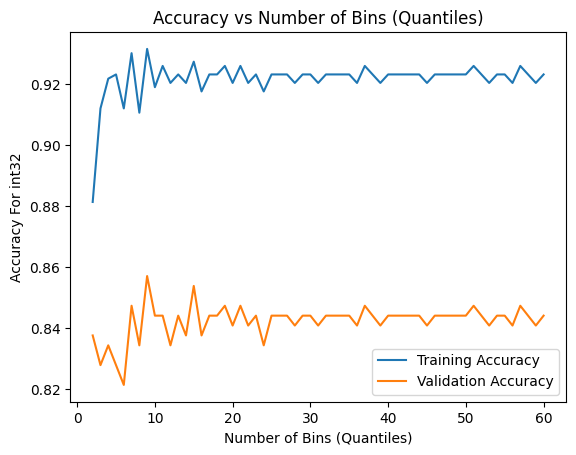

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
import time
import matplotlib.pyplot as plt

data_url = "https://drive.google.com/uc?id=1r_suZP4KhNxR05J68Qk9m3z4xl5kFvla"
df = pd.read_csv(data_url)

# Split the data into features (X) and labels (y)
X = df.drop('target', axis=1)
y = df['target']

# Apply feature scaling to the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Print the bit size of the input data
bit_size_train = X_scaled.dtype.itemsize * 8
print(f"Bit size of the input data (training set): {bit_size_train} bits")

# Print the bit size of the test set
bit_size_test = X_test.dtype.itemsize * 8
print(f"Bit size of the input data (test set): {bit_size_test} bits")

# Define the range of bins (number of quantiles)
bin_range = range(2, 61)

# Lists to store training and validation accuracy
train_accuracy_list = []
val_accuracy_list = []
bin_list = []

for n_bins in bin_range:
    # Apply quantization using KBinsDiscretizer
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
    X_train_quantized = discretizer.fit_transform(X_train)
    X_test_quantized = discretizer.transform(X_test)

    # Convert the quantized data to float32
    X_train_quantized = X_train_quantized.astype(np.int32)
    X_test_quantized = X_test_quantized.astype(np.int32)

    # Create and train the KNN model on the quantized training set
    knn = KNeighborsClassifier()
    knn.fit(X_train_quantized, y_train)

    # Predict labels for the quantized training and validation sets
    y_pred_train = knn.predict(X_train_quantized)
    y_pred_val = knn.predict(X_test_quantized)

    # Calculate the accuracy of the model on the quantized training and validation sets
    train_accuracy = accuracy_score(y_train, y_pred_train)
    val_accuracy = accuracy_score(y_test, y_pred_val)

    # Append accuracy and bin values to the lists
    train_accuracy_list.append(train_accuracy)
    val_accuracy_list.append(val_accuracy)
    bin_list.append(n_bins)

# Plot the graph
plt.plot(bin_list, train_accuracy_list, label='Training Accuracy')
plt.plot(bin_list, val_accuracy_list, label='Validation Accuracy')
plt.xlabel("Number of Bins (Quantiles)")
plt.ylabel("Accuracy For int32")
plt.title("Accuracy vs Number of Bins (Quantiles)")
plt.legend()
plt.show()


Bit size of the input data (training set): 64 bits
Bit size of the input data (test set): 64 bits


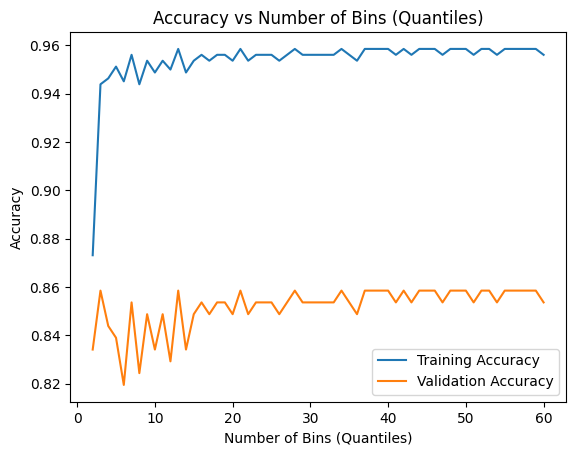

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
import time
import matplotlib.pyplot as plt

data_url = "https://drive.google.com/uc?id=1r_suZP4KhNxR05J68Qk9m3z4xl5kFvla"
df = pd.read_csv(data_url)

# Split the data into features (X) and labels (y)
X = df.drop('target', axis=1)
y = df['target']

# Apply feature scaling to the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print the bit size of the input data
bit_size_train = X_scaled.dtype.itemsize * 8
print(f"Bit size of the input data (training set): {bit_size_train} bits")

# Print the bit size of the test set
bit_size_test = X_test.dtype.itemsize * 8
print(f"Bit size of the input data (test set): {bit_size_test} bits")

# Define the range of bins (number of quantiles)
bin_range = range(2, 61)

# Lists to store training and validation accuracy
train_accuracy_list = []
val_accuracy_list = []
bin_list = []

for n_bins in bin_range:
    # Apply quantization using KBinsDiscretizer
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
    X_train_quantized = discretizer.fit_transform(X_train)
    X_test_quantized = discretizer.transform(X_test)

    # Convert the quantized data to int32
    X_train_quantized = X_train_quantized.astype(np.int32)
    X_test_quantized = X_test_quantized.astype(np.int32)

    # Create and train the KNN model on the quantized training set
    knn = KNeighborsClassifier()
    knn.fit(X_train_quantized, y_train)

    # Predict labels for the quantized training and validation sets
    y_pred_train = knn.predict(X_train_quantized)
    y_pred_val = knn.predict(X_test_quantized)

    # Calculate the accuracy of the model on the quantized training and validation sets
    train_accuracy = accuracy_score(y_train, y_pred_train)
    val_accuracy = accuracy_score(y_test, y_pred_val)

    # Append accuracy and bin values to the lists
    train_accuracy_list.append(train_accuracy)
    val_accuracy_list.append(val_accuracy)
    bin_list.append(n_bins)

# Plot the graph
plt.plot(bin_list, train_accuracy_list, label='Training Accuracy')
plt.plot(bin_list, val_accuracy_list, label='Validation Accuracy')
plt.xlabel("Number of Bins (Quantiles)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Bins (Quantiles)")
plt.legend()
plt.show()
